In [1]:
import os
from PIL import Image
import numpy as np
from scipy import misc
import random
import shutil
import matplotlib
import matplotlib.pyplot as plt


import tensorflow as tf

# Download ImageNet Images

**Clone [ImageNet_Utils](https://github.com/tzutalin/ImageNet_Utils) repository**
```
git clone git@github.com:tzutalin/ImageNet_Utils.git
```


**Download Images given wnid**
```
cd ImageNet_Utils
./downloadutils.py --downloadImages --wnid n02472987
```

In [5]:
classes = {"dog":"n02084071",
           "human": "n02472987",
           "car": "n02958343",
           "house": "n03544360"}

In [7]:
BASE_DIR = "/home/karen/Downloads/data/ImageNet_Utils"
get_class_path = lambda name: os.path.join(BASE_DIR, classes[name], "{}_urlimages".format(classes[name]))

# Plot Image Pixel Distribution

In [8]:
def plot_pixel_distribution(img_file):
    # load image
    img = misc.imread(img_file)

    # figure size
    fig = plt.figure(figsize=(16, 8))

    # plot image
    fig.add_subplot(1, 2, 1)
    plt.title("Image")
    plt.imshow(img)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))

    # plot hitogram
    fig.add_subplot(1, 2, 2)
    plt.title("Histogram")
    plt.hist(img.flatten())

    plt.show()

# Example of Good Image

In [9]:
g_image = "2800688_afe83c164a.jpg"
plot_pixel_distribution(os.path.join(get_class_path("dog"), g_image))

FileNotFoundError: [Errno 2] No such file or directory: '/home/karen/Downloads/data/ImageNet_Utils/n02084071/n02084071_urlimages/2800688_afe83c164a.jpg'

# Example of Bad Image

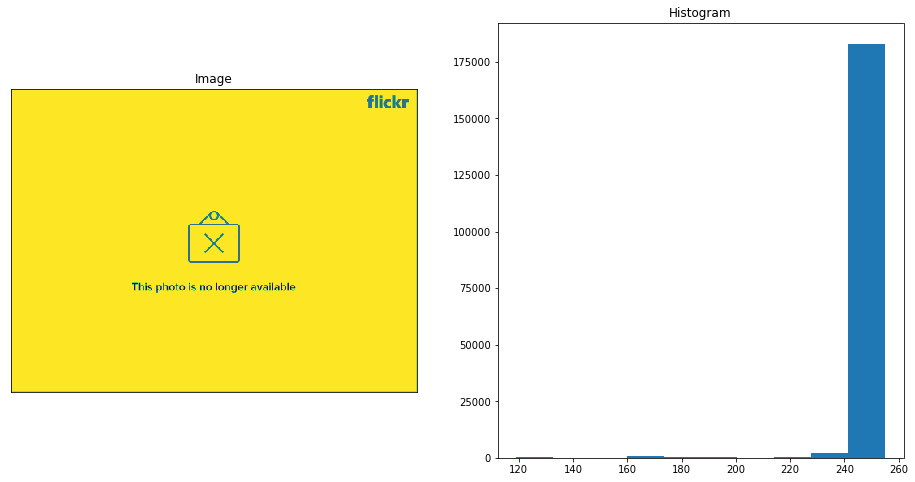

In [24]:
b_image = "1824736_a744fd42ee.jpg"
plot_pixel_distribution(os.path.join(get_class_path("dog"), b_image))

# Filter Bad Images

In [25]:
def filtered_images(images):
    
    good_images = []
    bad_images = []
    for filename in images:
        try:
            img = Image.open(filename)
            # pixel distribution
            v = img.histogram()
            h, w = img.size
            percentage_monochrome = max(v) / float(h*w)
            
            # filter bad and small images
            if percentage_monochrome > 0.8 or h < 300 or w <300:
                bad_images.append(filename)
            else:
                good_images.append(filename)
        except:
            pass
    
    print("Number of good images: {}\n".format(len(good_images)))
    print("Number of bad images: {}\n".format(len(bad_images)))
    return good_images, bad_images       

# Filter Dog Images

In [26]:
class_dir = get_class_path("dog")
dog_images = map(lambda f: os.path.join(class_dir, f), os.listdir(class_dir))

# filter dog images
g_images, b_images = filtered_images(dog_images)

Number of good images: 771

Number of bad images: 178



# Plot Bad Images

In [27]:
def plot_image_grid(images_files):
    # figure size
    fig = plt.figure(figsize=(8, 8))
    
    # load images
    images = [tf.contrib.keras.preprocessing.image.load_img(img) for img in images_files]
    
    # plot image grid
    for x in range(4):
        for y in range(4):
            ax = fig.add_subplot(4, 4, 4*y+x+1)
            plt.imshow(images[4*y+x])
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
    plt.show()

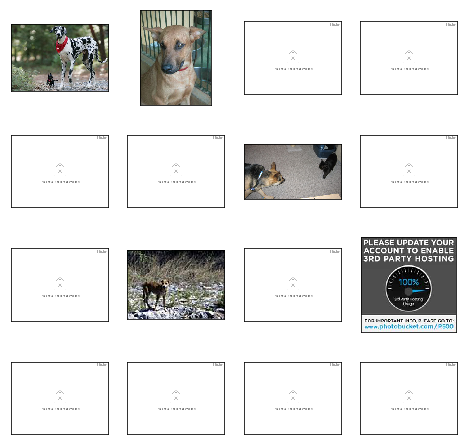

In [28]:
# plot bad images
plot_image_grid(b_images[:16])

# Filter and Explore Every Classes

Class Name: car

Number of good images: 791

Number of bad images: 201



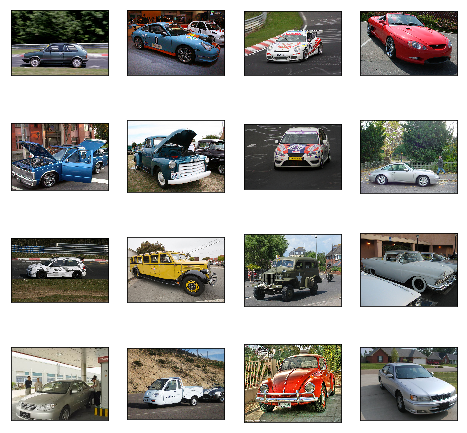

Class Name: dog

Number of good images: 771

Number of bad images: 178



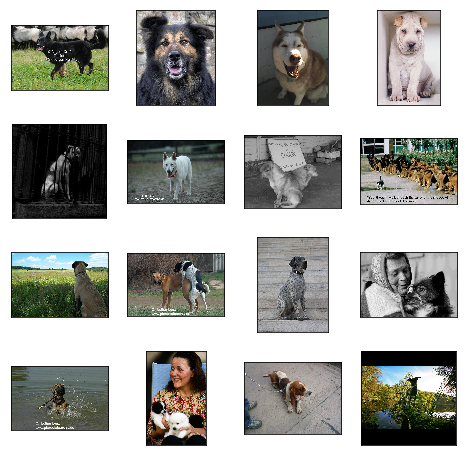

Class Name: human

Number of good images: 1226

Number of bad images: 249



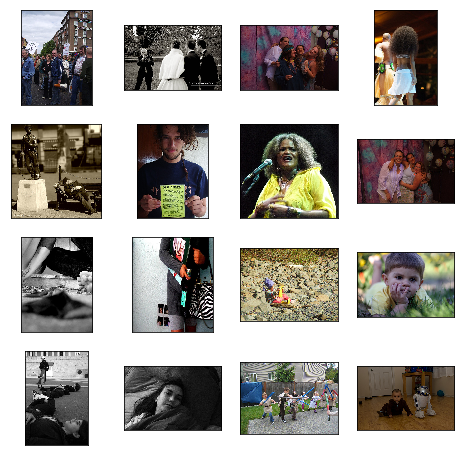

Class Name: house

Number of good images: 564

Number of bad images: 174



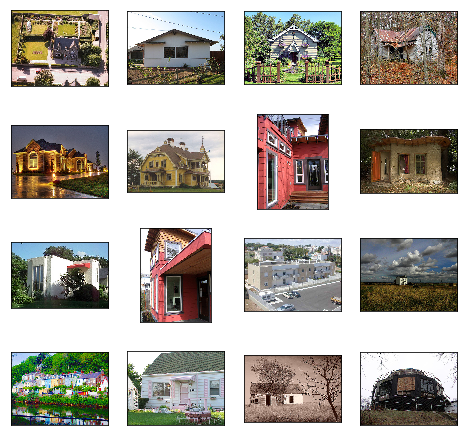

In [36]:
data_dic = {}
for class_name, wind_number in classes.iteritems():
    
    print("Class Name: {}\n".format(class_name))
    class_dir = get_class_path(class_name)
    class_images = map(lambda f: os.path.join(class_dir, f), os.listdir(class_dir))
    
    g_images, b_images = filtered_images(class_images)

    random.shuffle(g_images)
    data_dic[class_name] = g_images
    
    plot_image_grid(g_images[:16])

# Split Into Train and Validation Sets


In [37]:
# Create new directory and copy files to it
def copy_files_to_directory(files, directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        print("Created directory: {}".format(directory))

    for f in files:
        shutil.copy(f, directory)
    print("Copied {} files.\n".format(len(files)))

In [38]:
def train_validation_split(base_dir, data_dic, split_ratio=0.2):
    IMAGENET_DATASET = os.path.join(base_dir,"imageNet_dataset")

    if not os.path.exists(IMAGENET_DATASET):
        os.makedirs(IMAGENET_DATASET)

    for class_name, imgs in data_dic.iteritems():
        idx_split = int(len(imgs) * split_ratio)
        random.shuffle(imgs)
        validation = imgs[:idx_split]
        train = imgs[idx_split:]

        copy_files_to_directory(train, os.path.join(IMAGENET_DATASET,"train",class_name))
        copy_files_to_directory(validation, os.path.join(IMAGENET_DATASET,"validation",class_name))

In [41]:
# split data into train and validation
train_validation_split(BASE_DIR, data_dic, split_ratio=0.2)

Created directory: /Users/marvinbertin/GitHub/marvin/ImageNet_Utils/imageNet_dataset/train/car
Copied 633 files.

Created directory: /Users/marvinbertin/GitHub/marvin/ImageNet_Utils/imageNet_dataset/validation/car
Copied 158 files.

Created directory: /Users/marvinbertin/GitHub/marvin/ImageNet_Utils/imageNet_dataset/train/dog
Copied 617 files.

Created directory: /Users/marvinbertin/GitHub/marvin/ImageNet_Utils/imageNet_dataset/validation/dog
Copied 154 files.

Created directory: /Users/marvinbertin/GitHub/marvin/ImageNet_Utils/imageNet_dataset/train/human
Copied 981 files.

Created directory: /Users/marvinbertin/GitHub/marvin/ImageNet_Utils/imageNet_dataset/validation/human
Copied 245 files.

Created directory: /Users/marvinbertin/GitHub/marvin/ImageNet_Utils/imageNet_dataset/train/house
Copied 452 files.

Created directory: /Users/marvinbertin/GitHub/marvin/ImageNet_Utils/imageNet_dataset/validation/house
Copied 112 files.



# Final Directory Structure

```
.
├── train
│   ├── car
│   ├── dog
│   ├── house
│   └── human
└── validation
    ├── car
    ├── dog
    ├── house
    └── human
```

## Next Lesson
### Xception Architecture
- Inception module
- Depthwise Separable Convolutions

<img src="../../images/divider.png" width="100">